## **線形回帰**

#### **Gradient Descentを用いた線形回帰（Linear Regression）**
Linear Regressionが示すのは、多くのデータ点を最もよく説明できるトレンドラインを引くにはどうすればよいかという問題です。

#### **線形代数学の視点から見た回帰分析**
このセクションでは、線形代数学の視点から回帰分析を捉えるために、以下の前提知識を理解しておくと良いです。

- ベクトルの基本演算（スカラー倍、加算）
- 行ベクトルの意味とベクトルの内積
- 4つの主要部分空間の関係
- 連立方程式を用いた解の探索



### **連立方程式を用いたソリューションの探索**
中学校で連立方程式について学んだことがあると思います。連立方程式は2つ以上の未知数を含む方程式の集合を指しますが、一般的に高校の過程では2元1次連立方程式を解くことが多いです。

以下は連立方程式の一般的な形です。
$$ \begin{cases}
ax + by = p \\
cx + dy = q
\end{cases} \qquad(1)$$

今回は未知数の数よりデータが多い場合に、適切な解を見つける過程を通じて線形回帰について考えてみます。例えば、以下のように3つのデータポイントが与えられているとします。

$$ (-1, 0), (0, 1), (0, 3) \qquad(2)$$





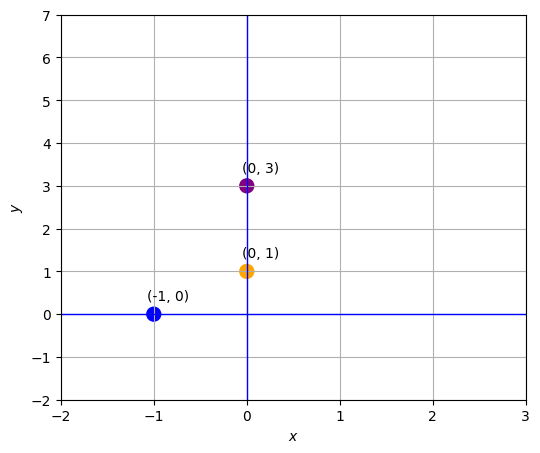

In [1]:
import matplotlib.pyplot as plt

# データポイント
x = [-1, 0, 0]
y = [0, 1, 3]
colors = ['blue', 'orange', 'purple']

# プロットの作成
plt.figure(figsize=(6, 5))
plt.scatter(x, y, c=colors, s=100)

# 軸線の追加
plt.axhline(0, color='blue', lw=1)
plt.axvline(0, color='blue', lw=1)

# ラベルの追加
labels = ['(-1, 0)', '(0, 1)', '(0, 3)']
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]), textcoords="offset points", xytext=(10,10), ha='center')

# 軸の範囲設定
plt.xlim(-2, 3)
plt.ylim(-2, 7)

# 軸ラベル
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# グリッドの追加
plt.grid(True)

# グラフの表示
plt.show()


#### **与えられたデータポイント**
この3つの点を直線で表すとき、モデル $ f(x) = mx + b $ を使ってこれらのデータポイントを説明する場合、以下の連立方程式を立てることができます。

$$
f(-1) = -m + b = 0 \qquad(3)
$$

$$
f(0) = 0 + b = 1 \qquad(4)
$$

$$
f(0) = 0 + b = 3 \qquad(5)
$$

この方程式は次のように行列とベクトルを使って表せます。

$$
A\vec{x} = \vec{b} \quad \rightarrow \quad
\begin{bmatrix}
-1 & 1 \\
0 & 1 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
m \\
b
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1 \\
3
\end{bmatrix} \qquad(6)
$$

この行列を解く問題を幾何学的に捉えると、これらの3つのデータポイントをすべて通過する直線を見つける問題に相当します。2次元平面上でどのように直線を置いても、これらの3つの点をすべて通る直線を見つけることはできません。この問題は解が存在しないため解くことができません。



## 連立方程式を解く（3点を通る直線を求める）

線形代数で連立方程式を解くということは以下の式を解くことになります。

$$
A\vec{x} = \vec{b} \\
$$

ここで、ベクトルと行列をすべて列ベクトルで表現し、$\vec{x}$を2つの要素に分けて書くと次式になります。

$$
\begin{bmatrix}
| & | \\
\vec{a}_1 & \vec{a}_2 \\
| & |
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
| \\
\vec{b} \\
|
\end{bmatrix} \qquad(8)
$$  


そうすると以下のように考えることができます。

$$
x_1
\begin{bmatrix}
| \\
\vec{a}_1 \\
|
\end{bmatrix}
+
x_2
\begin{bmatrix}
| \\
\vec{a}_2 \\
|
\end{bmatrix}
=
\begin{bmatrix}
| \\
\vec{b} \\
|
\end{bmatrix} \qquad(9)
$$


すなわち、$\vec{a}_1$ と $\vec{a}_2$ をどのように組み合わせて、$\vec{b}$ を得るかに対する答えを得ることが問題です。

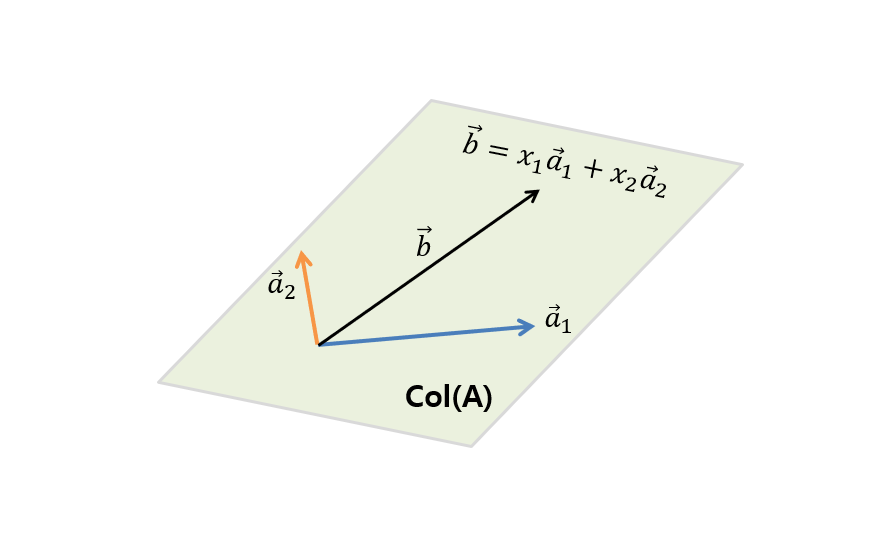

$A$の列ベクトル$\vec{a_1}$と$\vec{a_2}$によって生成される空間（span）である$A$の列空間$col{A}$に含まれる$\vec{b}$を求めるには$\vec{a_1}$と$\vec{a_2}$をどのように組み合わせるべきか？

しかし、$\vec{a_1}$と$\vec{a_2}$を組み合わせて$\vec{b}$を得るためには、$\vec{b}$は$\vec{a_1}$と$\vec{a_2}$を組み合わせることのできる得ることのできるすべての場合の数の1つであるべきです。すなわち、**$\vec{a_1}$と$\vec{a_2}$の生成空間(span）内に$\vec{b}$が含まれる**べきです。これか解を得るための条件です。


#### **最適な解を探す**
正しい答えが見つからない場合、データの傾向を最もよく表現する直線を探すことができます。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3点の座標
points_x = [-1, 0, 0]
points_y = [0, 1, 3]

# 最適な直線の方程式: y = 2x + 2
x = np.linspace(-2, 2, 100)
y = 2 * x + 2

# グラフの描画
plt.figure(figsize=(8, 6))

# 直線の描画
plt.plot(x, y, linestyle='--', color='green', label=r'$y = 2x + 2$')

# 3点の描画
plt.scatter(points_x, points_y, color='blue', zorder=5)

# 各点にラベルをつける
plt.text(-1, 0, '(-1, 0)', fontsize=12, ha='right')
plt.text(0, 1, '(0, 1)', fontsize=12, ha='left')
plt.text(0, 3, '(0, 3)', fontsize=12, ha='left')

# 軸の設定
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line for Three Points')
plt.legend()
plt.show()

ここで、この3つのデータの傾向を最もよく表す直線を探すことは、線形代数では、解$\vec{b}$が行列$A$の列空間(Column Space)内に存在しない場合、列空間に最も近い解を探すことと同じであると考えることができます。

$\vec{a_1}$と$\vec{a_2}$で生成される列空間とベクトル\vec{b}$を空間上に表現すると次のようになります。

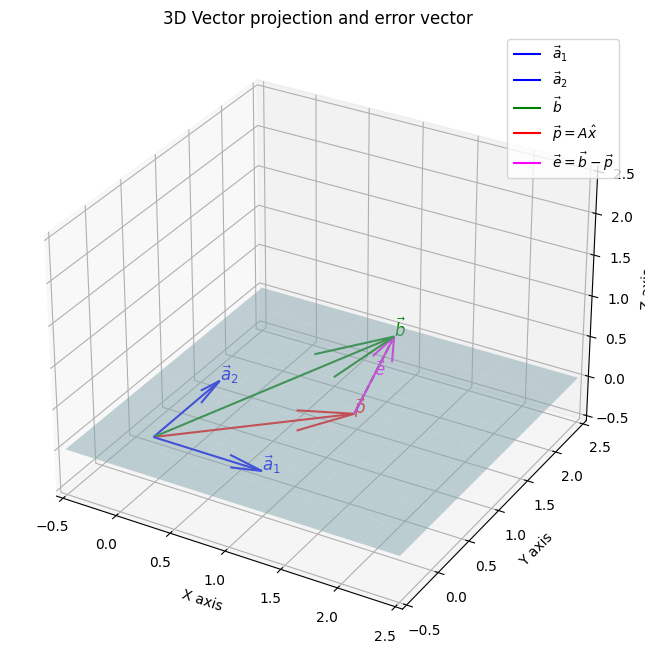

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# ベクトルの定義（3次元）
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
b = np.array([1.5, 1.2, 1.0])
p = np.array([1.2, 1.1, 0])
e = b - p

# 3Dプロットの設定
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 平面の描画
xx, yy = np.meshgrid(np.linspace(-0.5, 2.5, 10), np.linspace(-0.5, 2.5, 10))
zz = np.zeros_like(xx)  # z = 0 の平面
ax.plot_surface(xx, yy, zz, color='lightblue', alpha=0.5)

# ベクトルの描画
ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='blue', label=r'$\vec{a}_1$')
ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='blue', label=r'$\vec{a}_2$')
ax.quiver(0, 0, 0, b[0], b[1], b[2], color='green', label=r'$\vec{b}$')
ax.quiver(0, 0, 0, p[0], p[1], p[2], color='red', label=r'$\vec{p} = A\hat{x}$')
ax.quiver(p[0], p[1], p[2], e[0], e[1], e[2], color='magenta', label=r'$\vec{e} = \vec{b} - \vec{p}$')

# 垂線の描画（破線）
ax.plot([b[0], p[0]], [b[1], p[1]], [b[2], p[2]], linestyle='--', color='black')

# ラベルの追加
ax.text(a1[0], a1[1], a1[2], r'$\vec{a}_1$', fontsize=12, color='blue')
ax.text(a2[0], a2[1], a2[2], r'$\vec{a}_2$', fontsize=12, color='blue')
ax.text(b[0], b[1], b[2], r'$\vec{b}$', fontsize=12, color='green')
ax.text(p[0], p[1], p[2], r'$\vec{p}$', fontsize=12, color='red')
ax.text((b[0] + p[0]) / 2, (b[1] + p[1]) / 2, (b[2] + p[2]) / 2, r'$\vec{e}$', fontsize=12, color='magenta')

# 軸の設定
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([-0.5, 2.5])
ax.set_zlim([-0.5, 2.5])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.grid(True)

# 凡例とタイトル
ax.legend()
plt.title('3D Vector projection and error vector')

# グラフの表示
plt.show()

### **Aの列ベクトルのスパンと最適なベクトルの計算**

行列 $A$ の列を構成する列ベクトル $\vec{a}_1$ と $\vec{a}_2$ のスパン（span）は、行列 $A$ の列空間（column space）$\text{col}(A)$ を形成しています。しかし、図5に示すように、ベクトル $\vec{b}$ はこの列空間には含まれていません。

図5のように、ベクトル $\vec{b}$ と最も近い、$\vec{a}_1$ と $\vec{a}_2$ の線形結合で得られる最適なベクトルは、$\vec{b}$ が列空間 $\text{col}(A)$ に直交射影された $\vec{p}$ です。私たちはこの $\vec{p}$ を計算することで、ベクトル $\vec{a}_1$ と $\vec{a}_2$ をどのように線形結合すればよいか、つまり $\hat{x}$ を求めることができます。

#### **元の解 $\vec{b}$ と直交射影ベクトル $\vec{p}$ の関係**
元の解 $\vec{b}$ と直交射影ベクトル $\vec{p}$ の差ベクトルを $\vec{e}$ とすると、$\vec{e}$ は行列 $A$ のどのベクトルとも直交します。このため、次の式が成り立ちます。

$$
A \cdot \vec{e} =
\begin{bmatrix}
| & | \\
\vec{a}_1 & \vec{a}_2 \\
| & |
\end{bmatrix}
\cdot \vec{e} = 0 \quad \qquad(10)
$$

ここで、「$\cdot$」は内積を表します。内積を計算すると次のようになります。

$$
A^T \vec{e} = A^T (\vec{b} - A \hat{x}) = 0 \quad  \qquad(11)
$$

$$
⇒ A^T \vec{b} - A^T A \hat{x} = 0 \quad \qquad(12)
$$

$$
⇒ A^T A \hat{x} = A^T \vec{b} \quad \qquad(13)
$$

$$
∴ \hat{x} = (A^T A)^{-1} A^T \vec{b} \quad \qquad(14)
$$



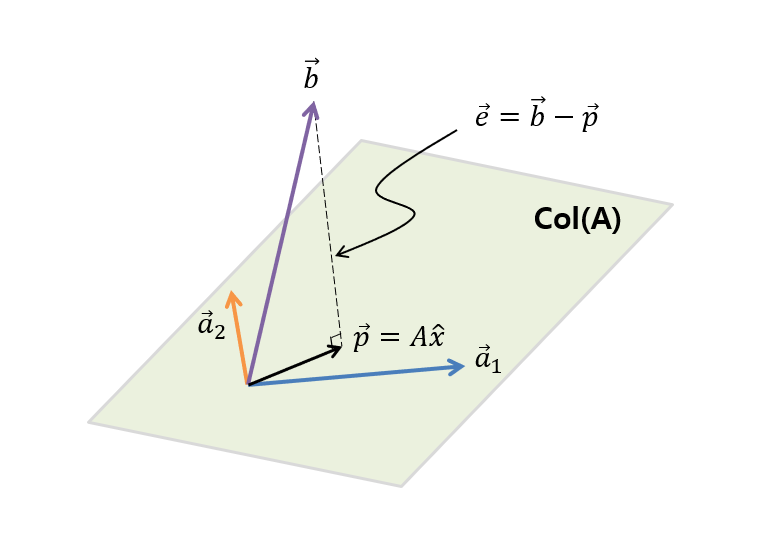

$A$の列空間$col(A)$とその空間上に存在しないベクトル$\vec{b}$

#### **基本部分空間を用いた説明**
図5における $\vec{e}$ は列空間上のすべてのベクトルと直交しています。これは、4つの主要部分空間の関係に基づくと、$\vec{e}$ がleft null space（左核空間）に属していることを示しています。言い換えると、ベクトル $\vec{b}$ は列空間上の基底ベクトルとleft null space上の基底ベクトルで構成される空間に位置しています。最も近い列空間上のベクトルが $\vec{p}$、そしてleft null space 上のベクトルが $\vec{e}$ です。

この関係を図示すると以下のようになります。



#### **図6: 線形代数的に考える線形回帰の基本空間の関係**
（出典：Introduction to Linear Algebra, Gilbert Strang）

null space（零空間）がゼロである理由は、null spaceがゼロ空間でない場合、関数の形状は完全に垂直方向に向かうためです。このような場合、関数の定義ができない（つまり、傾きが無限に大きくなる状態）ため、線形回帰モデルを利用して解を求める場合、null spaceが零空間でないケースは除外する必要があります。


#### **行列の列空間に投影されたベクトル**
図のように、元の解 $\vec{b}$ とその投影ベクトル $\vec{p}$ の差ベクトルを $\vec{e}$ とすると、$\vec{e}$ は行列 $A$ の任意のベクトルと直交します。つまり、$\vec{e}$ は行列 $A$ の列空間に直交します。

$$
A^T e = A^T (\vec{b} - A \hat{x}) = 0
$$

このことから、最適な解 $\hat{x}$ は次のように計算できます。

$$
\hat{x} = (A^T A)^{-1} A^T \vec{b}
$$

### **最適化問題の視点から見た回帰分析**
最適化問題の視点から見た回帰分析は、データに対するモデル設定から始めることができます。以下のように2つの特性を持つデータがあるとします。

#### **コスト関数の定義**
どの直線がデータを最もよく説明するのかを決める必要があります。ここで「最もよく説明する」ということは、モデルとデータ間の誤差が最も小さくなることを意味します。すなわち、誤差が最小のモデルが良いモデルと言えます。誤差を次のように定義することができます。

$$
e_i = \hat{y}_i - y_i
$$

ここで、$\hat{y}_i$ はモデルによって計算された予測値で、$y_i$ はデータによって与えられた値です。全てのデータに対する平均的な誤差は次のように計算できます。

$$
E = \frac{1}{2N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2
$$

モデルがデータを最もよく説明するというのは、このコスト関数 $E$ を最小化する $a$ と $b$ を見つけることと同じです。

### **Gradient Descentを用いたコスト関数の最小化**
Gradient Descent（勾配降下法）は、関数の最小値を見つける一般的な手法であり、回帰モデルのコスト関数の最小値を求めるためによく使用されます。更新するごとに勾配の反対方向に進みながら、コスト関数 $E$ の最小値を見つけます。

$$
\begin{bmatrix}
a \\
b
\end{bmatrix}
:=
\begin{bmatrix}
a \\
b
\end{bmatrix}
- \alpha \nabla f(a, b)
$$

この方法で勾配を反映しながらパラメータを調整することで、最適な線形回帰モデルを見つけることができます。
